<a href="https://colab.research.google.com/github/sarbajeetroy/sarbajeetroy/blob/main/human_deficiency_from_nail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install google-api-python-client requests pillow

In [ ]:
from PIL import Image, UnidentifiedImageError
from googleapiclient.discovery import build
from PIL import Image
from io import BytesIO
import shutil
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



# Define the source and destination directories
destination_dir = 'images'
source_dir = '/content/drive/My Drive/downloaded_nail_images' # Create a new directory in Drive destination_dir

# Create the destination directory in Google Drive if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Copy the contents of the source directory to the destination directory
try:
    shutil.copytree(source_dir, destination_dir, dirs_exist_ok=True)
    print(f"Successfully copied all files from '{source_dir}' to '{destination_dir}'")
except FileNotFoundError:
    print(f"Error: Source directory '{source_dir}' not found.")
except Exception as e:
    print(f"An error occurred during copying: {e}")

Mounted at /content/drive
Successfully copied all files from '/content/drive/My Drive/downloaded_nail_images' to 'images'


In [ ]:
from fastai.vision.all import *

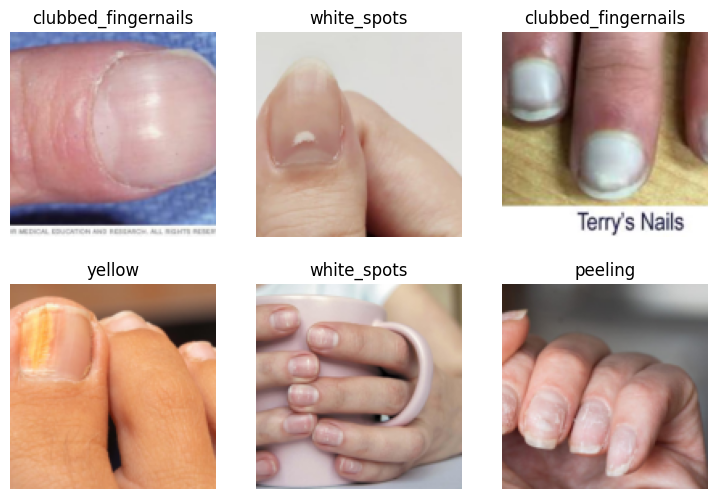

In [ ]:
path = Path('images')
nails = DataBlock(
        blocks=(ImageBlock, CategoryBlock),
        get_items=get_image_files,
        splitter=RandomSplitter(valid_pct=0.2, seed=42),
        get_y=parent_label,
        item_tfms=Resize(128))
dls = nails.dataloaders(path)
dls.show_batch(max_n=6)

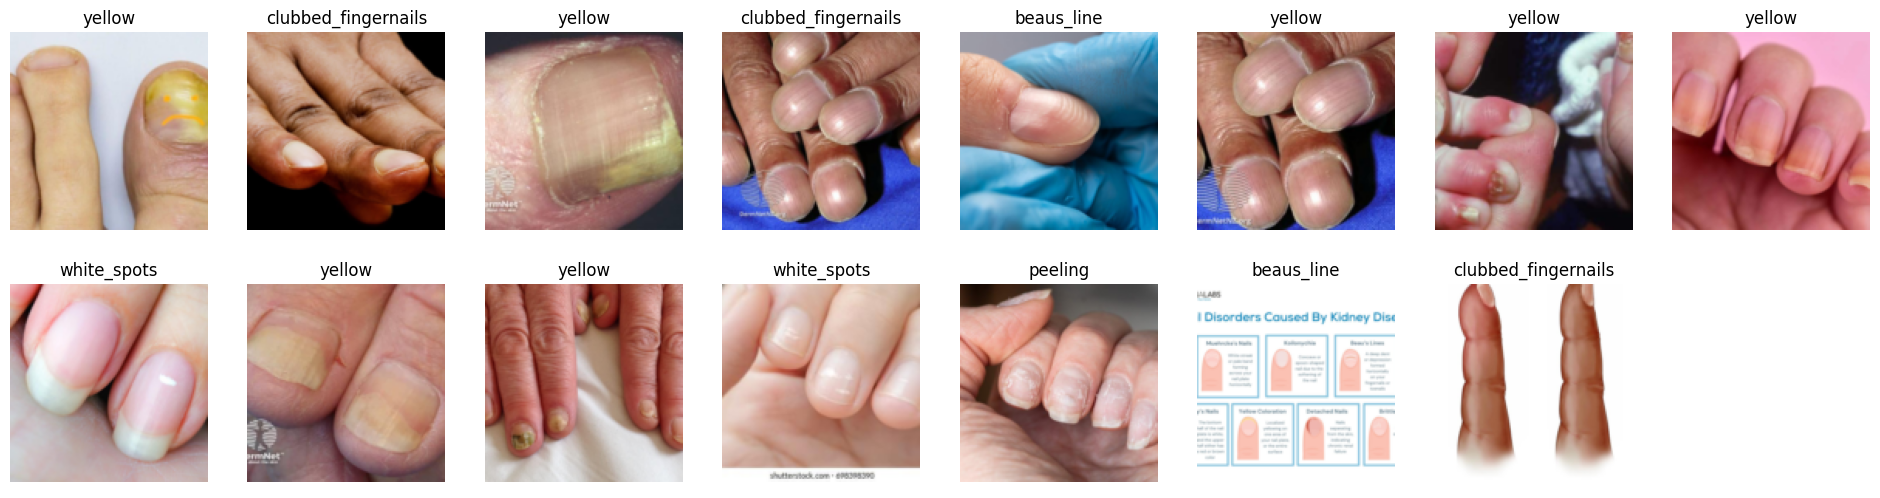

In [ ]:
dls.valid.show_batch(max_n=15, nrows=2)

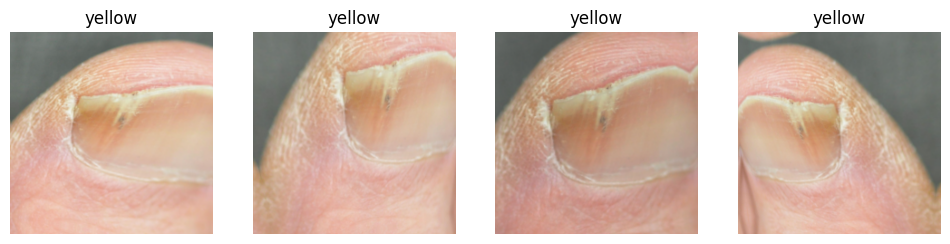

In [ ]:
nails = nails.new(
        item_tfms=RandomResizedCrop(224, min_scale=0.5),
        batch_tfms=aug_transforms())
dls = nails.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)

In [ ]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.812210,2.257840,0.761905,00:39


epoch,train_loss,valid_loss,error_rate,time
0,2.199683,1.924188,0.761905,01:02
1,2.045550,1.584688,0.595238,00:50
2,1.749626,1.418577,0.547619,00:48
3,1.622316,1.327583,0.452381,00:49


In [ ]:
import os

os.makedirs('/content/drive/My Drive/downloaded_nail_images', exist_ok=True)
learn.export('/content/drive/My Drive/downloaded_nail_images/model.pkl')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()